In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import urllib.request
from kiwipiepy import Kiwi
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
df = pd.read_csv("./100세 시대 빈곤 노인 은퇴 후 빈곤층 전락2016.csv", header=None, encoding="utf-8")
df

,0,1,2,3
0,comment,author,date,num_likes
1,학원을 없애든지 공교육을 없애라<br>찢어지게 가난한 부모 등골 빠진다,@user-rg4yu7vd7k,2023-11-12T10:41:23Z,0
2,"뼈빠지게 일해서 자녀교육에 바치고, 자녀들결혼 관계로 집팔고<br>몇푼 남은 돈으로...",@esletter49,2023-10-09T13:56:33Z,0
3,오건호씨 말씅이 너무 적절합니다<br>저도 66세 여자 독거인데 마음이 무겁습니다,@user-ux3vb7vt2o,2023-09-27T13:59:02Z,0
4,노인이 빈곤해지지 않을려면 자식들보다 본인을 먼저 챙겨야 함,@JSH-do5qf,2023-09-06T09:16:05Z,0
...,...,...,...,...
2051,170 apple 맞습니다. 그러나 사교육을 국가차원에서 단속한다 해도 결국 할놈들...,@yjtvkorea,2017-02-02T08:01:22Z,16
2052,예전에는 과외를 불법이라 못하게 했는데 불법폐지가 되면서 너나할것없이 과외에 학원에...,@user-yc7tr6by5u,2018-08-05T07:14:38Z,5
2053,"사교육으로 먹고사는 사람이 얼마나많은데 각종 학원 강사,원장,과외,컨설팅..정부가 ...",@kky5635,2018-10-17T15:23:17Z,3
2054,@@kky5635 그러게여 지금은 과외를 막는것보다 시험제도의 틀을 확바꾸든지 해야할듯,@user-yc7tr6by5u,2018-10-17T16:44:17Z,2


In [70]:
df1 = pd.read_csv("./100세 시대 빈곤 노인 은퇴 후 빈곤층 전락2016.csv", header=0, encoding="utf-8")
df2 = pd.read_csv("./가난한 나는 노인입니다2017.csv", header=0, encoding="utf-8")

merged_df = pd.concat([df1, df2])

selected_columns = ['comment', 'num_likes']
result_df = merged_df[selected_columns]

# "<br>"을 띄어쓰기로 바꾸기
result_df['comment'] = result_df['comment'].str.replace('<br>', ' ')

result_df


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 0: invalid continuation byte

In [55]:
import pandas as pd
from transformers import pipeline



# 감정 분석 파이프라인 생성
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

# 'predicted_sentiment'라는 빈 컬럼 추가
result_df['predicted_sentiment'] = ""

# 각 댓글에 대해 감정 예측 및 라벨링
max_token_length = 512

def predict_sentiment(comment):
    tokens = classifier.tokenizer(comment, max_length=max_token_length, truncation=True, return_tensors='pt')
    prediction = classifier.model(**tokens)
    label = prediction.logits.argmax().item()
    return classifier.model.config.id2label[label]

result_df['predicted_sentiment'] = result_df['comment'].apply(predict_sentiment)

# 결과 확인
result_df[['comment', 'predicted_sentiment']]

,comment,predicted_sentiment
0,학원을 없애든지 공교육을 없애라<br>찢어지게 가난한 부모 등골 빠진다,1 star
1,"뼈빠지게 일해서 자녀교육에 바치고, 자녀들결혼 관계로 집팔고<br>몇푼 남은 돈으로...",1 star
2,오건호씨 말씅이 너무 적절합니다<br>저도 66세 여자 독거인데 마음이 무겁습니다,2 stars
3,노인이 빈곤해지지 않을려면 자식들보다 본인을 먼저 챙겨야 함,2 stars
4,냉정하게 말해서 노후준비를 못했다는건 다 본인의 무능력함이고 핑계고 본인 능력 부족...,2 stars
...,...,...
2050,170 apple 맞습니다. 그러나 사교육을 국가차원에서 단속한다 해도 결국 할놈들...,1 star
2051,예전에는 과외를 불법이라 못하게 했는데 불법폐지가 되면서 너나할것없이 과외에 학원에...,1 star
2052,"사교육으로 먹고사는 사람이 얼마나많은데 각종 학원 강사,원장,과외,컨설팅..정부가 ...",1 star
2053,@@kky5635 그러게여 지금은 과외를 막는것보다 시험제도의 틀을 확바꾸든지 해야할듯,3 stars


In [60]:
result_df.dropna
result_df.to_csv('predicted_comments.csv', index=False)

In [67]:
a = result_df[['num_likes']]
a.to_csv('predicted_comments_likes.csv', index=False, encoding='utf-8')

In [81]:
df3 = pd.read_csv("./가난한 한국 노인.csv", header=0, encoding="utf-8")



In [78]:
df4 = pd.read_csv("./넉넉하지도 행복하지도 않은 노년.csv", header=0, encoding="utf-8")


In [80]:
df5 = pd.read_csv("./한국 노인 절반이 빈곤층.csv", header=0, encoding="cp949")

In [82]:
merged_df2 = pd.concat([df3, df4, df5])
merged_df2

selected_columns = ['comment', 'num_likes']
result_df2 = merged_df2[selected_columns]

# "<br>"을 띄어쓰기로 바꾸기
result_df2['comment'] = result_df2['comment'].str.replace('<br>', ' ')

result_df2

C:\Users\DS\AppData\Local\Temp\ipykernel_14972\4178950294.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df2['comment'] = result_df2['comment'].str.replace('<br>', ' ')


,comment,num_likes
0,지금부터 교육. 엄마가 가난해도 엄마 모른척하고 니인생 살으령~~ 설사엄마가 아파...,0
1,왜못했냐고 1년에 500만모아도 40년이면 2억인데 뭐했음??,0
2,3저호황시기에 뭐했음,0
3,돈도 돈이지만 건강 관리 잘 하는게 최고의 노후대책,1
4,그래서 어쩌라고,0
...,...,...
259,전 세대가 불행한 연구대상 헬 조선 ..,8
260,이 나라 포기해라. 남 잘사는 꼴 못보는게.아니라 숨쉬는것 조차 못보는 나라가되어가...,0
261,포기하면 어디로 가게 다른나라로 가는게 쉬운줄아나,0
262,극단주의자의 단점,0


In [110]:
import pandas as pd
from transformers import pipeline

# 감정 분석 파이프라인 생성
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

# 'predicted_sentiment'라는 빈 컬럼 추가
df3['predicted_sentiment'] = ""

# 각 댓글에 대해 감정 예측 및 라벨링
max_token_length = 512

def predict_sentiment(comment):
    # 각 댓글에 대해 문자열로 변환
    comment_str = str(comment)
    
    # 각 댓글에 대해 감정 예측
    tokens = classifier.tokenizer(comment_str, max_length=max_token_length, truncation=True, return_tensors='pt')
    prediction = classifier.model(**tokens)
    label = prediction.logits.argmax().item()
    return classifier.model.config.id2label[label]

# 각 댓글에 대해 감정 예측 및 결과 저장
df3['predicted_sentiment'] = df3['comment'].apply(predict_sentiment)

# 결과 확인
print(df5[['comment', 'predicted_sentiment']])


                                               comment predicted_sentiment
0       인구가 없어면 우리나라가 소멸하면  대책을  내놓아야지  뜬구름 잡는정책은 이제그만              1 star
1                                                이런젠장,             5 stars
2    OECD 국가들은 자산과 수입 테스트를 통해 모든 65세 노인들에게 노인 지원금을 ...              1 star
3                     아프지 마세요.<br>늙어서 치료 해줄 젊은 의사들 없네요              1 star
4    사회분위기를 봐라돈없는사람은 인간취급도 안하고 있는사람만 잘났다고 갑질하는데 너같으...              1 star
..                                                 ...                 ...
259                             전 세대가 불행한 연구대상 헬 조선 ..             5 stars
260  이 나라 포기해라. 남 잘사는 꼴 못보는게.아니라 숨쉬는것 조차 못보는 나라가되어가...              1 star
261                        포기하면 어디로 가게 다른나라로 가는게 쉬운줄아나              1 star
262                                          극단주의자의 단점             3 stars
263                                                 ??              1 star

[264 rows x 2 columns]


In [120]:
a = df3[['comment']]
a.to_csv('predicted_comments1.csv', index=False, encoding='utf-8')

In [112]:
a = df5[['predicted_sentiment']]
a.to_csv('predicted_comments.csv', index=False, encoding='utf-8')

In [113]:
a = df5[['num_likes']]
a.to_csv('predicted_comments_likes.csv', index=False, encoding='utf-8')

In [118]:
import pandas as pd
from transformers import pipeline

# 감정 분석 파이프라인 생성
classifier = pipeline('sentiment-analysis')

# 'predicted_sentiment'라는 빈 컬럼 추가
df3['predicted_sentiment'] = ""

# 각 댓글에 대해 감정 예측 및 라벨링
max_token_length = 512

def predict_sentiment(comment):
    # 각 댓글에 대해 문자열로 변환
    comment_str = str(comment)
    
    # 각 댓글에 대해 감정 예측
    tokens = classifier.tokenizer(comment_str, max_length=max_token_length, truncation=True, return_tensors='pt')
    prediction = classifier.model(**tokens)
    label = prediction.logits.argmax().item()
    return classifier.model.config.id2label[label]

# 각 댓글에 대해 감정 예측 및 결과 저장
df3['predicted_sentiment'] = df3['comment'].apply(predict_sentiment)

# 결과 확인
print(df3[['comment', 'predicted_sentiment']])


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                               comment predicted_sentiment
0    지금부터 교육. 엄마가 가난해도 엄마 모른척하고 니인생 살으령~~  설사엄마가 아파...            POSITIVE
1                   왜못했냐고 1년에 500만모아도 40년이면 2억인데 뭐했음??            NEGATIVE
2                                          3저호황시기에 뭐했음            POSITIVE
3                         돈도 돈이지만 건강 관리 잘 하는게 최고의 노후대책            POSITIVE
4                                             그래서 어쩌라고            POSITIVE
..                                                 ...                 ...
154  내 주변에 60대 완전 노는 사람없습니다 <br>공무원 퇴직 해도 기본 재산이 많치...            POSITIVE
155              근데 건강관리 잘만 하면 요즘 다들 정정하세요 병원에서만 봐도 그럼            POSITIVE
156  가난한 한국노인? 더더욱 가난할 미래세대에겐 희망은 있고? 현 60대 이상들은 한국...            NEGATIVE
157  앞으로 훨씬 더 많아 질꺼다. 지금 오마카세나 명품에 쩔은 젊은 욜로 청년들도 많고...            POSITIVE
158  노후대비책중 하나가 연금 아니었냐?<br>그거 우리세대는 아무 혜택도 못받는다는데 ...            NEGATIVE

[159 rows x 2 columns]


In [119]:
a = df3[['predicted_sentiment']]
a.to_csv('predicted_comments.csv', index=False, encoding='utf-8')

In [121]:
import pandas as pd
from transformers import pipeline



# 감정 분석 파이프라인 생성
classifier = pipeline('sentiment-analysis')

# 'predicted_sentiment'라는 빈 컬럼 추가
result_df['predicted_sentiment'] = ""

# 각 댓글에 대해 감정 예측 및 라벨링
max_token_length = 512

def predict_sentiment(comment):
    tokens = classifier.tokenizer(comment, max_length=max_token_length, truncation=True, return_tensors='pt')
    prediction = classifier.model(**tokens)
    label = prediction.logits.argmax().item()
    return classifier.model.config.id2label[label]

result_df['predicted_sentiment'] = result_df['comment'].apply(predict_sentiment)

# 결과 확인
result_df[['comment', 'predicted_sentiment']]

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,comment,predicted_sentiment
0,학원을 없애든지 공교육을 없애라<br>찢어지게 가난한 부모 등골 빠진다,POSITIVE
1,"뼈빠지게 일해서 자녀교육에 바치고, 자녀들결혼 관계로 집팔고<br>몇푼 남은 돈으로...",NEGATIVE
2,오건호씨 말씅이 너무 적절합니다<br>저도 66세 여자 독거인데 마음이 무겁습니다,POSITIVE
3,노인이 빈곤해지지 않을려면 자식들보다 본인을 먼저 챙겨야 함,POSITIVE
4,냉정하게 말해서 노후준비를 못했다는건 다 본인의 무능력함이고 핑계고 본인 능력 부족...,NEGATIVE
...,...,...
2050,170 apple 맞습니다. 그러나 사교육을 국가차원에서 단속한다 해도 결국 할놈들...,POSITIVE
2051,예전에는 과외를 불법이라 못하게 했는데 불법폐지가 되면서 너나할것없이 과외에 학원에...,POSITIVE
2052,"사교육으로 먹고사는 사람이 얼마나많은데 각종 학원 강사,원장,과외,컨설팅..정부가 ...",POSITIVE
2053,@@kky5635 그러게여 지금은 과외를 막는것보다 시험제도의 틀을 확바꾸든지 해야할듯,POSITIVE


In [123]:
a = result_df['predicted_sentiment']
a.to_csv('predicted_comments.csv', index=False, encoding='utf-8')

In [132]:
df = pd.read_csv("2016,2017_sentiment.csv", header=0, encoding='cp949')


df['sentiment'] = ""


def clean_label(predicted_label):
    return predicted_label.split(' ')[0]

df['sentiment'] = df['predicted_sentiment'].apply(clean_label).astype(int)
df

,comment,predicted_sentiment,num_likes,predicted_sentiment.1,sentiment
0,학원을 없애든지 공교육을 없애라<br>찢어지게 가난한 부모 등골 빠진다,1 star,0,POSITIVE,1
1,"뼈빠지게 일해서 자녀교육에 바치고, 자녀들결혼 관계로 집팔고<br>몇푼 남은 돈으로...",1 star,0,NEGATIVE,1
2,오건호씨 말씅이 너무 적절합니다<br>저도 66세 여자 독거인데 마음이 무겁습니다,2 stars,0,POSITIVE,2
3,노인이 빈곤해지지 않을려면 자식들보다 본인을 먼저 챙겨야 함,2 stars,0,POSITIVE,2
4,냉정하게 말해서 노후준비를 못했다는건 다 본인의 무능력함이고 핑계고 본인 능력 부족...,2 stars,0,NEGATIVE,2
...,...,...,...,...,...
2050,170 apple 맞습니다. 그러나 사교육을 국가차원에서 단속한다 해도 결국 할놈들...,1 star,16,POSITIVE,1
2051,예전에는 과외를 불법이라 못하게 했는데 불법폐지가 되면서 너나할것없이 과외에 학원에...,1 star,5,POSITIVE,1
2052,"사교육으로 먹고사는 사람이 얼마나많은데 각종 학원 강사,원장,과외,컨설팅..정부가 ...",1 star,3,POSITIVE,1
2053,@@kky5635 그러게여 지금은 과외를 막는것보다 시험제도의 틀을 확바꾸든지 해야할듯,3 stars,2,POSITIVE,3


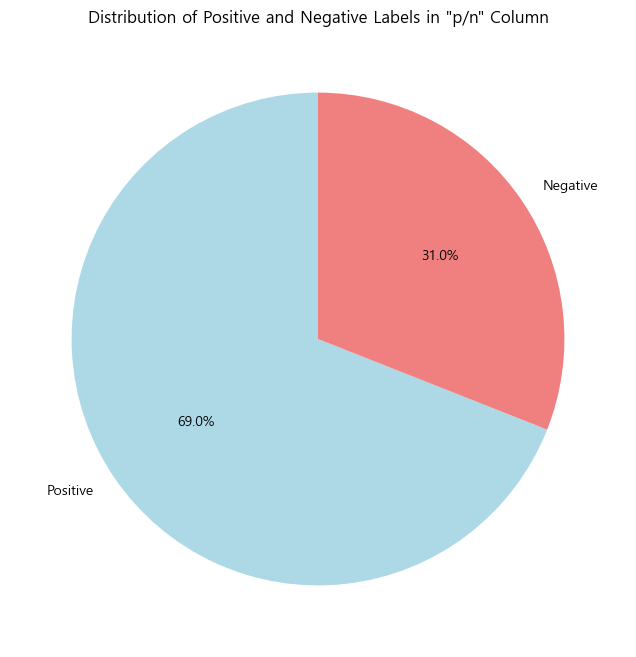

In [160]:
df_present = pd.read_csv("df3,4,5.csv", header=0, encoding='cp949')


# 'p/n' 컬럼의 0과 1의 개수 세기
counts = df_present['sub'].value_counts()

# 라벨 변경
labels = ['Positive', 'Negative']

# 원 그래프로 시각화
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.show()

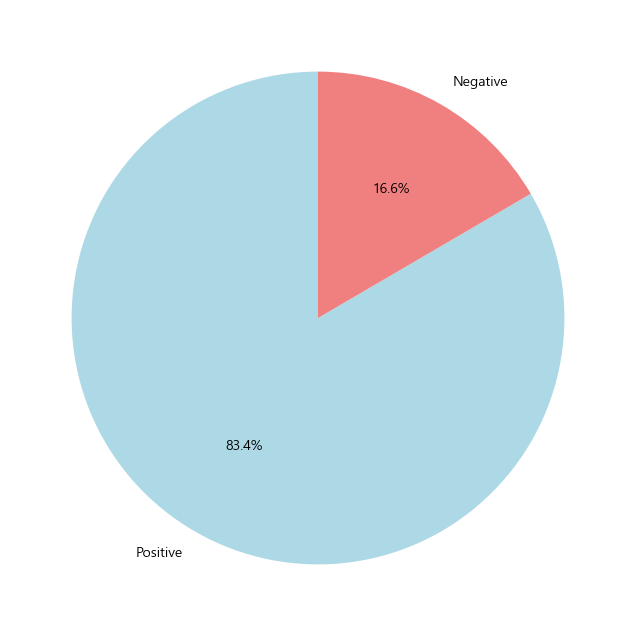

In [161]:
df_present = pd.read_csv("2016,2017_sentiment.csv", header=0, encoding='cp949')


# 'p/n' 컬럼의 0과 1의 개수 세기
counts = df_present['sub'].value_counts()

# 라벨 변경
labels = ['Positive', 'Negative']

# 원 그래프로 시각화
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.show()